## Import the required libraries

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

%matplotlib inline


## Reading the data

M- Murder;
A- Assault;
UrbanPop- UrbanPopulation;
R- Rape;

In [16]:
crimeR = pd.read_csv("USArrests.csv")
crimeR.head()

,State,M,A,UrbanPop,R
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


**Scaling our data so that the large value won't dominate how clusters are defined**

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
X = crimeR[['M','A','UrbanPop','R']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:4,:]

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398]])

Now, the variance of KMeans cluster is calculated by using different values of number of clusters from 1 to 10. These variance will be plotted to see the lower variance, by the **elbow chart method.**

In [19]:
distortions = []

for k in range(1,10):
    kmeanModel = KMeans(n_clusters = k)
    kmeanModel.fit(X_scaled)
    distortions.append(kmeanModel.inertia_) #Sum of squared distances of samples to their closest cluster center.

Plotting the distortions of K-Means

Text(0.5, 1.0, 'Plotting the variance')

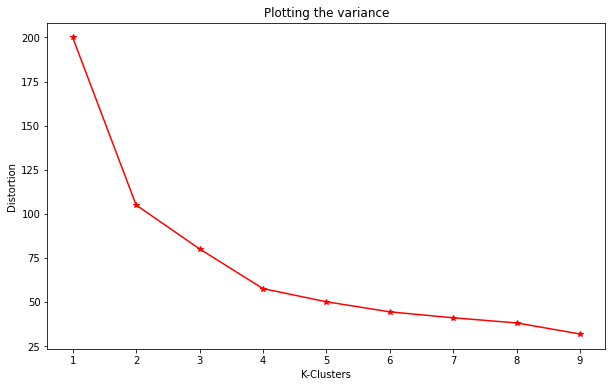

In [20]:
plt.figure(figsize=(10,6))
K = range(1,10)
plt.plot(K, distortions, 'r*-')
plt.xlabel('K-Clusters')
plt.ylabel('Distortion')
plt.title('Plotting the variance')

by observing the **elbow chart graph**, number of clusters = **4** is optimal solution for this case. now training our model with n_clusters = 4

In [21]:
kmeanModel = KMeans(n_clusters=4)
kmeanModel.fit(X_scaled)

KMeans(n_clusters=4)

In [22]:
crimeR['Cluster ID'] = kmeanModel.labels_
crimeR['Cluster ID'] = crimeR['Cluster ID'].astype('str')
crimeR.head()

,State,M,A,UrbanPop,R,Cluster ID
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,2


In [23]:
 us_state_abbrev = {  
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}
crimeR['State_Short']=crimeR['State'].replace(us_state_abbrev)

In [24]:
crimeR.head()

,State,M,A,UrbanPop,R,Cluster ID,State_Short
0,Alabama,13.2,236,58,21.2,0,AL
1,Alaska,10.0,263,48,44.5,2,AK
2,Arizona,8.1,294,80,31.0,2,AZ
3,Arkansas,8.8,190,50,19.5,0,AR
4,California,9.0,276,91,40.6,2,CA


<AxesSubplot:xlabel='M', ylabel='UrbanPop'>

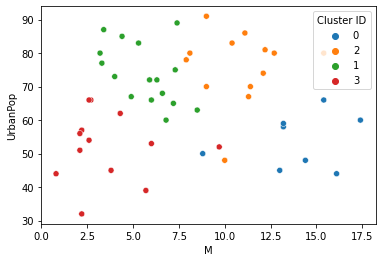

In [35]:
sns.scatterplot(x='M',y='UrbanPop',data=crimeR, hue='Cluster ID')

<AxesSubplot:xlabel='A', ylabel='UrbanPop'>

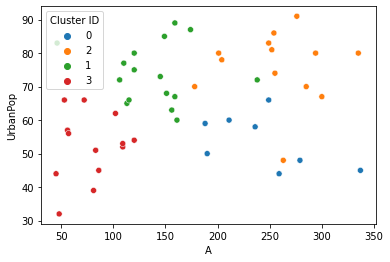

In [39]:
sns.scatterplot(x='A',y='UrbanPop',data=crimeR, hue='Cluster ID')

In [ ]:
sns.scatterplot(x='R',y='UrbanPop',data=crimeR, hue='Cluster ID')

In [45]:
import plotly.express as px 
fig = px.choropleth(crimeR,  
                    locations='State_Short',  
                    color="Cluster ID", 
                    hover_name="State", 
                    locationmode = 'USA-states') 
fig.update_layout(
    title_text = 'US States Crime Arrest Grouping', 
    geo_scope='usa',
)
print(fig.show())

None


In [44]:
crimeR.describe()


,M,A,UrbanPop,R
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000
